xy=(0, 0)
 f(x)=-2.08
 f'(x)=[2 0]
 f''(x)=[[-2  0]
 [ 0 -2]]
xy_one = [1. 0.]
xy=(1, 0)
 f(x)=-2.08
 f'(x)=[-4  2]
 f''(x)=[[-14   4]
 [  4  -2]]
xy_one = [1. 1.]
xy=(0, 1)
 f(x)=-3.08
 f'(x)=[ 2 -2]
 f''(x)=[[ 2  0]
 [ 0 -2]]
xy_one = [-1.  0.]
xy=(1, 1)
 f(x)=-1.08
 f'(x)=[0 0]
 f''(x)=[[-10   4]
 [  4  -2]]
xy_one = [1. 1.]
xy=(1, 2)
 f(x)=-2.08
 f'(x)=[ 4 -2]
 f''(x)=[[-6  4]
 [ 4 -2]]
xy_one = [1. 1.]
xy=(2, 2)
 f(x)=-6.08
 f'(x)=[-18   4]
 f''(x)=[[-42   8]
 [  8  -2]]
xy_one = [1.8 3.2]
xy=(2, 4)
 f(x)=-2.08
 f'(x)=[-2  0]
 f''(x)=[[-34   8]
 [  8  -2]]
xy_one = [1.0000000e+00 8.8817842e-16]


/tmp/ipykernel_16283/4228029677.py:96: UserWarning: The following kwargs were not used by contour: 'label'
  axs[0, ixy].contourf(x_mesh, y_mesh, np.exp(logPfunction_n(x_mesh, y_mesh)), label='True')
/tmp/ipykernel_16283/4228029677.py:99: UserWarning: The following kwargs were not used by contour: 'label'
  axs[1, ixy].contourf(x_mesh, y_mesh, laplace_Pfunction(x_mesh, y_mesh), label='Laplace')
/tmp/ipykernel_16283/4228029677.py:94: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.linalg.det(logP_d2)/(2*np.pi**2)) * np.exp(0.5*np.einsum('i...,ij,j...->...', xy_diff, logP_d2, xy_diff))


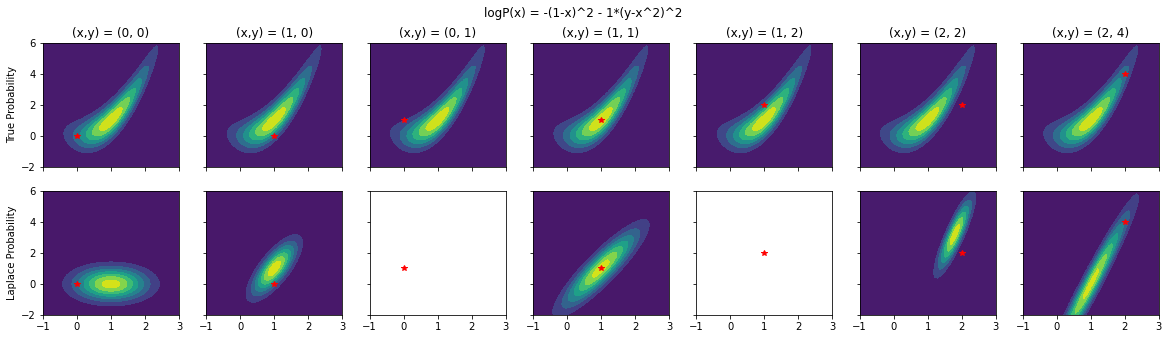

In [10]:
import numpy as np
import matplotlib.pyplot as plt

onedimensional = False

def random_function(a,b):
    return lambda x: -x**2 + a*np.cos(x+b)
def random_function_d1(a,b):
    return lambda x: -2*x - a*np.sin(x+b)
def random_function_d2(a,b):
    return lambda x: -2 - a*np.cos(x+b)

def rosenbrock(a,b):
    return lambda x,y : -(a-x)**2 - b*(y-x**2)**2
def rosenbrock_d1(a,b):
    return lambda x,y: np.array([2*(a-x) + 4*b*x*(y-x**2),
                                 -2*b*(y-x**2)] )
def rosenbrock_d2(a,b):
    return lambda x,y: np.array([[-2 + 4*b*(y-x**2) - 8*b*x**2,     4*b*x],
                                 [4*b*x,                            -2*b ]])


if onedimensional:
    n_points_axis = 50
    min_range_axis, max_range_axis = -5, 5  
    a, b = 0, 0
    logPfunction = random_function(a,b)
    logPfunction_d1 = random_function_d1(a,b)
    logPfunction_d2 = random_function_d2(a,b)

    x_grid = np.linspace(min_range_axis, max_range_axis, n_points_axis, dtype=np.float32)
    normalization = np.sum(np.exp(logPfunction(x_grid))) * (max_range_axis-min_range_axis) / n_points_axis
    logPfunction_n = lambda x: logPfunction(x) - np.log(normalization)

    x_zeros = [-2, -1, -0.5, 0, 0.5, 1, 2]
    fig, axs = plt.subplots(2, len(x_zeros), sharex='col', sharey='row', figsize=(20,5))
    for ix, x_zero in enumerate(x_zeros):
        logP = logPfunction_n(x_zero)
        logP_d1 = logPfunction_d1(x_zero)
        logP_d2 = logPfunction_d2(x_zero)

        x_one = x_zero - logP_d1/logP_d2
        laplace_logPfunction = lambda x: logP - 0.5*logP_d1**2/logP_d2 + 0.5*logP_d2*(x-x_one)**2
        laplace_Pfunction = lambda x: np.sqrt(-logP_d2/(2*np.pi)) * np.exp(0.5*logP_d2*(x-x_one)**2)

        print(f"x={x_zero}, f(x)={round(logP,2)}, f'(x)={round(logP_d1,2)}, f''(x)={round(logP_d2,2)} ---> x_one={round(x_one,2)}")
        axs[0, ix].plot(x_grid, logPfunction_n(x_grid), label='True')
        axs[0, ix].plot(x_grid, laplace_logPfunction(x_grid), c='g', label='Laplace')
        axs[0, ix].axvline(x=x_zero, c='g', alpha=0.5)
        axs[0, ix].set_title('x = '+str(x_zero))
        axs[1, ix].plot(x_grid, np.exp(logPfunction_n(x_grid)), label='True')
        axs[1, ix].plot(x_grid, laplace_Pfunction(x_grid), c='g', label='Laplace')
        axs[1, ix].axvline(x=x_zero, c='g', alpha=0.5)
        if ix==0:
            axs[0, ix].set_ylabel('log Probability')
            axs[0, ix].legend()
            axs[1, ix].set_ylabel('Probability')
    fig.suptitle(f"logP(x) = -x^2 + {a}*cos(x+{b})")
    fig.savefig("laplace_test/prob_function.png")

else:
    n_points_axis = 50
    min_range_Xaxis, max_range_Xaxis = -1, 3
    min_range_Yaxis, max_range_Yaxis = -2, 6
    a, b = 1, 1
    logPfunction = rosenbrock(a,b)
    logPfunction_d1 = rosenbrock_d1(a,b)
    logPfunction_d2 = rosenbrock_d2(a,b)

    x_grid = np.linspace(min_range_Xaxis, max_range_Xaxis, n_points_axis, dtype=np.float32)
    y_grid = np.linspace(min_range_Yaxis, max_range_Yaxis, n_points_axis, dtype=np.float32)
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
    normalization = np.sum(np.exp(logPfunction(x_mesh,y_mesh))) * (max_range_Xaxis-min_range_Xaxis)*(max_range_Yaxis-min_range_Yaxis) / n_points_axis**2
    logPfunction_n = lambda x,y: logPfunction(x,y) - np.log(normalization)

    xy_zeros = [(0,0), (1,0), (0,1), (1,1), (1,2), (2,2), (2,4)]
    fig, axs = plt.subplots(2, len(xy_zeros), sharex='col', sharey='row', figsize=(20,5))
    for ixy, xy_zero in enumerate(xy_zeros):
        logP = logPfunction_n(*xy_zero)
        logP_d1 = logPfunction_d1(*xy_zero)
        logP_d2 = logPfunction_d2(*xy_zero)
        print(f"xy={xy_zero}\n f(x)={np.around(logP,2)}\n f'(x)={np.around(logP_d1,2)}\n f''(x)={np.around(logP_d2,2)}")

        logP_d2_inv = np.linalg.inv(logP_d2)
        xy_one = xy_zero - logP_d2_inv @ logP_d1
        print(f"xy_one = {xy_one}")

        #laplace_Pfunction = lambda x,y: np.sqrt(np.linalg.det(logP_d2)/(2*np.pi**2)) * np.exp(0.5*(np.array([x,y])-xy_one).T @ logP_d2 @ (np.array([x,y])-xy_one) )
        def laplace_Pfunction(x,y): 
            try:
                xy_diff = (np.transpose([x,y],(2,1,0))-xy_one ).T
            except:
                xy_diff = [x,y] - xy_one
            return np.sqrt(np.linalg.det(logP_d2)/(2*np.pi**2)) * np.exp(0.5*np.einsum('i...,ij,j...->...', xy_diff, logP_d2, xy_diff))

        axs[0, ixy].contourf(x_mesh, y_mesh, np.exp(logPfunction_n(x_mesh, y_mesh)), label='True')
        axs[0, ixy].plot(*xy_zero, 'r*')
        axs[0, ixy].set_title(f"(x,y) = {xy_zero}")
        axs[1, ixy].contourf(x_mesh, y_mesh, laplace_Pfunction(x_mesh, y_mesh), label='Laplace')
        axs[1, ixy].plot(*xy_zero, 'r*')
    axs[0, 0].set_ylabel('True Probability')
    axs[1, 0].set_ylabel('Laplace Probability')
    fig.suptitle(f"logP(x) = -({a}-x)^2 - {b}*(y-x^2)^2")
    fig.savefig("laplace_test/2D_prob_function.png")

In [119]:
A = np.array([[1,2],[3,4]])
b = np.array([1,2])
b.T@A@b

27

In [115]:
b = np.array([b,b,b,b,b,b])
np.einsum('xi,ij,xj->x',b,A,b)

array([27, 27, 27, 27, 27, 27])